# Image Classification Using Multi Layer Perceptron

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os


room_types = os.listdir('dataset')
print (room_types)  

print("Types of rooms found: ", len(room_types))


['bed_room', 'dining_room', 'living_room']
Types of rooms found:  3


In [3]:
rooms = []

for item in room_types:
 # Get all the file names
 all_rooms = os.listdir('dataset' + '/' +item)
 #print(all_shoes)

 # Add them to the list
 for room in all_rooms:
    rooms.append((item, str('dataset' + '/' +item) + '/' + room))
    print(rooms[:1])

[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_room', 'dataset/bed_room/apartment-2094734__340.jpg')]
[('bed_r

In [4]:
# Build a dataframe        
rooms_df = pd.DataFrame(data=rooms, columns=['room type', 'image'])
print(rooms_df.head())
print(rooms_df.tail())

  room type                                              image
0  bed_room        dataset/bed_room/apartment-2094734__340.jpg
1  bed_room        dataset/bed_room/apartment-4744139__340.jpg
2  bed_room     dataset/bed_room/architecture-2141065__340.jpg
3  bed_room  dataset/bed_room/architecture-modern-house-bea...
4  bed_room             dataset/bed_room/baby-1266117__340.jpg
       room type                                             image
388  living_room  dataset/living_room/victoria-borodinova-706.jpeg
389  living_room          dataset/living_room/wall-823611__340.jpg
390  living_room        dataset/living_room/woman-2099465__340.jpg
391  living_room         dataset/living_room/young-510440__340.jpg
392  living_room         dataset/living_room/young-510453__340.jpg


In [5]:
# Let's check how many samples for each category are present
print("Total number of rooms in the dataset: ", len(rooms_df))

Total number of rooms in the dataset:  393


In [6]:
room_count = rooms_df['room type'].value_counts()

print("rooms in each category: ")
print(room_count)

rooms in each category: 
bed_room       159
living_room    148
dining_room     86
Name: room type, dtype: int64


In [7]:
import cv2
path = 'dataset/'


#im_size = 100
im_size = 300

images = []
labels = []

for i in room_types:
    data_path = path + str(i) 
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [8]:
# Transform the image array to a numpy type

images = np.array(images)

images.shape

(393, 300, 300, 3)

In [9]:
images = images.astype('float32') / 255.0

In [10]:
images.shape

(393, 300, 300, 3)

In [11]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


y=rooms_df['room type'].values
print(y[:5])

['bed_room' 'bed_room' 'bed_room' 'bed_room' 'bed_room']


In [12]:
# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [13]:

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(373, 300, 300, 3)
(373,)
(20, 300, 300, 3)
(20,)


# Now our data is ready for Image Classification


#########################################################################################################################

In [14]:
# Develop a sequential model using tensorflow keras
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300,300,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
   
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

Using TensorFlow backend.
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.in

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 270000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               69120256  
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 69,121,027
Trainable params: 69,121,027
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compute the model parameters

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Train the model  with 5 epochs 

model.fit(train_x,train_y, epochs=5)




Epoch 1/5
373/373 [==============================] - 4s 11ms/step - loss: 4.4957 - accuracy: 0.3914
Epoch 2/5
373/373 [==============================] - 4s 11ms/step - loss: 4.0540 - accuracy: 0.4021
Epoch 3/5
373/373 [==============================] - 4s 11ms/step - loss: 3.0139 - accuracy: 0.4182
Epoch 4/5
373/373 [==============================] - 4s 11ms/step - loss: 2.0575 - accuracy: 0.3378
Epoch 5/5
373/373 [==============================] - 4s 11ms/step - loss: 1.1887 - accuracy: 0.4075


In [18]:
y_pred = model.predict_classes(test_x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

# Take input from user

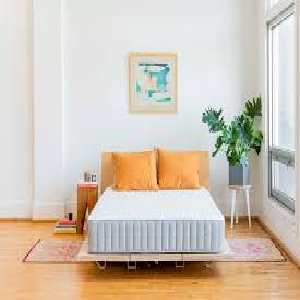

In [19]:
from keras.preprocessing.image import load_img

import numpy as np

image = load_img('t2.jpg', target_size=(300, 300))   # predicting correct 
image


In [20]:
# convert the image pixels to a numpy array
image = np.array(image)
image.shape

# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))



In [21]:
yhat = model.predict(image)
yhat

array([[0.31677377, 0.3919051 , 0.29132116]], dtype=float32)